<a href="https://colab.research.google.com/github/eouai/GraphML/blob/main/GraphEmbeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Node2Vec  and Embeddings


<a href="https://colab.research.google.com/github/joerg84/Graph_Powered_ML_Workshop/blob/master/Node2VecIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will explore a basic example using our favorite Karate Club Graph and Node2Vec.



In [ ]:
%%capture
!pip3 install  node2vec

In [ ]:
import networkx as nx
import pandas as pd
from node2vec import Node2Vec as n2v

In [ ]:
# Load the Zachary's Karate Club as a NetworkX Graph object
KCG = nx.karate_club_graph()

print(KCG.nodes[1])
print(KCG.nodes[33])

# print final assignments
#for node in KCG.nodes:
#  print(str(node+1)+"," + str(KCG.nodes[node]['club']))

nx.draw(KCG, with_labels=True, font_weight='bold')

Next, let us run Node2Vec to create embeddings.

In [ ]:
# Generate Random walks
g_emb = n2v(KCG, dimensions=2)
WINDOW = 1 # Node2Vec fit window
MIN_COUNT = 1 # Node2Vec min. count
BATCH_WORDS = 4 # Node2Vec batch words

# Fit model
model = g_emb.fit(
    vector_size = 2,
    window=WINDOW,
    min_count=MIN_COUNT,
    batch_words=BATCH_WORDS
)

Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 73.24it/s]


Let us find similar members/nodes:

In [ ]:
input_node = '1'
for s in model.wv.most_similar(input_node, topn = 10):
    print(s)

('3', 0.9999979734420776)
('7', 0.9994000196456909)
('21', 0.9970986247062683)
('19', 0.9946516156196594)
('17', 0.9941343665122986)
('12', 0.9931171536445618)
('11', 0.990408718585968)
('0', 0.9901020526885986)
('13', 0.9838855266571045)
('2', 0.9716970920562744)


Let us combine the embedding with the actual club name after the split.

In [ ]:
embeddings = []
for node in KCG.nodes:
  embedding = list(model.wv.get_vector(str(node)))
  club = KCG.nodes[node]['club']
  embeddings.append(embedding + [club])

df = pd.DataFrame(embeddings, columns=['x', 'y', 'club'])
print(df)

           x         y     club
0  -0.099800  1.508025   Mr. Hi
1  -0.263341  1.254599   Mr. Hi
2  -0.483147  1.012099   Mr. Hi
3  -0.265597  1.278335   Mr. Hi
4   0.206034  2.051667   Mr. Hi
5   0.356359  2.426596   Mr. Hi
6   0.370813  2.343691   Mr. Hi
7  -0.293011  1.189405   Mr. Hi
8  -0.801963  0.775659   Mr. Hi
9  -1.087682  0.650888  Officer
10  0.343252  2.358052   Mr. Hi
11 -0.099590  1.456186   Mr. Hi
12 -0.129414  1.442079   Mr. Hi
13 -0.431730  1.060347   Mr. Hi
14 -1.614658  0.434806  Officer
15 -1.448942  0.483744  Officer
16  0.402373  2.506666   Mr. Hi
17 -0.138683  1.402914   Mr. Hi
18 -1.448128  0.502102  Officer
19 -0.364710  1.137110   Mr. Hi
20 -1.589963  0.460195  Officer
21 -0.181872  1.383553   Mr. Hi
22 -1.613955  0.448825  Officer
23 -1.746511  0.430239  Officer
24 -1.899190  0.372463  Officer
25 -1.885608  0.381966  Officer
26 -1.923214  0.363703  Officer
27 -1.499502  0.461271  Officer
28 -1.025097  0.642554  Officer
29 -1.983379  0.390498  Officer
30 -0.98

Let us print the embedded nodes together with the color of the actual resulting club.

<Axes: xlabel='x', ylabel='y'>

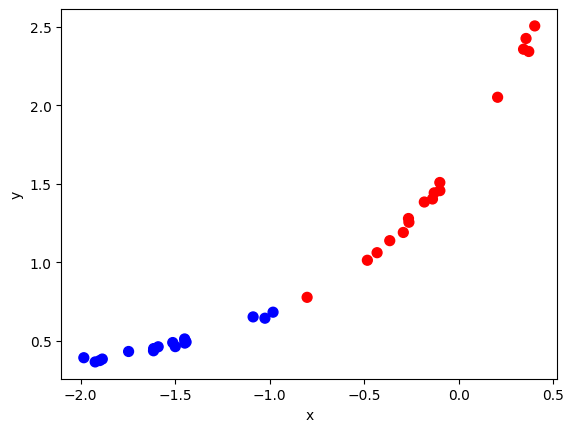

In [ ]:
colors = ['red' if x == 'Mr. Hi' else 'blue' for x in df.club]
df.plot.scatter(x='x', y='y', s=50, c=colors)

# Bonus:  Dimensionality Reduction

Normally, we want embeddings dimensions greater than two. Unfortunately, high dimensional spaces are ... hard to visualize. Luckily we have tools such as [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) or [UMAP](https://umap-learn.readthedocs.io/en/latest/basic_usage.html) to reduce dimensionality.

In [ ]:
import numpy as np
from sklearn.manifold import TSNE

In [ ]:
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2, learning_rate='auto',
             init='random', perplexity=3).fit_transform(X)
X_embedded.shape